In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data.csv')
df.head()

,Ngày,Giá điều chỉnh,Giá đóng cửa,Thay đổi,Khối lượng khớp lệnh,Giá trị khớp lệnh,KL thoả thuận,GT thoả thuận,Giá mở cửa,Giá cao nhất,Giá thấp nhất
0,14/12/2023,32.0,32.0,0(0.00 %),15658600,504492000000,0,0,32.5,32.50,31.9
1,13/12/2023,32.0,32.0,-0.6(-1.84 %),21549400,700751000000,982000,32013200000,32.9,32.95,32.0
2,12/12/2023,32.6,32.6,-0.1(-0.31 %),12453800,406841000000,1500001,48975030450,32.8,33.00,32.5
3,11/12/2023,32.7,32.7,0.1(0.31 %),19996900,649302000000,25001,815030350,32.6,33.05,32.1
4,08/12/2023,32.6,32.6,-0.25(-0.76 %),18079900,591368000000,1,30600,32.7,33.00,32.3


## Câu hỏi 1:

### 1.1 Nội dung câu hỏi
- Làm thế nào để dự đoán sự biến động của thị trường chứng khoán trong tương lai dựa trên dữ liệu lịch sử, bao gồm giá điều chỉnh, khối lượng giao dịch, và các yếu tố khác?

### 1.2 Lợi ích khi trả lời câu hỏi:
- Dự đoán sự biến động của thị trường có thể giúp nhà đầu tư và các chuyên gia tài chính đưa ra quyết định đầu tư thông minh và hiệu quả.
- Hiểu biến động có thể giúp giảm rủi ro và tối ưu hóa lợi nhuận.

### 1.3 Nguồn cảm hứng của câu hỏi
Nhóm tự suy nghĩ từ trong quá trình khám phá dữ liệu.

### 1.4 Cách tìm ra câu trả lời:
- Phân tích đặc điểm thống kê: Sử dụng các phương pháp thống kê và phân tích dữ liệu để hiểu các đặc điểm quan trọng của dữ liệu, như trung bình, độ lệch chuẩn, skewness, kurtosis, v.v.
- Tạo các chỉ số kỹ thuật: Tính toán các chỉ số kỹ thuật như trung bình động, MACD, RSI, v.v., để đánh giá xu hướng và sự mạnh mẽ của thị trường.
- Sử dụng mô hình dự đoán: Áp dụng các mô hình học máy như Linear Regression, Decision Trees, hoặc các mô hình phức tạp hơn như LSTM (Long Short-Term Memory) để dự đoán giá chứng khoán trong tương lai dựa trên các biến đầu vào.
- Kiểm tra và đánh giá mô hình: Sử dụng dữ liệu kiểm thử để đánh giá hiệu suất của mô hình dự đoán. Cân nhắc sử dụng các phương pháp đánh giá như Mean Absolute Error (MAE) hoặc Root Mean Squared Error (RMSE).
- Tối ưu hóa mô hình: Nếu mô hình không đạt kết quả mong muốn, thực hiện tối ưu hóa mô hình bằng cách điều chỉ các tham số hoặc thử nghiệm các mô hình khác nhau.

Mean Absolute Error: 4.654033525321724


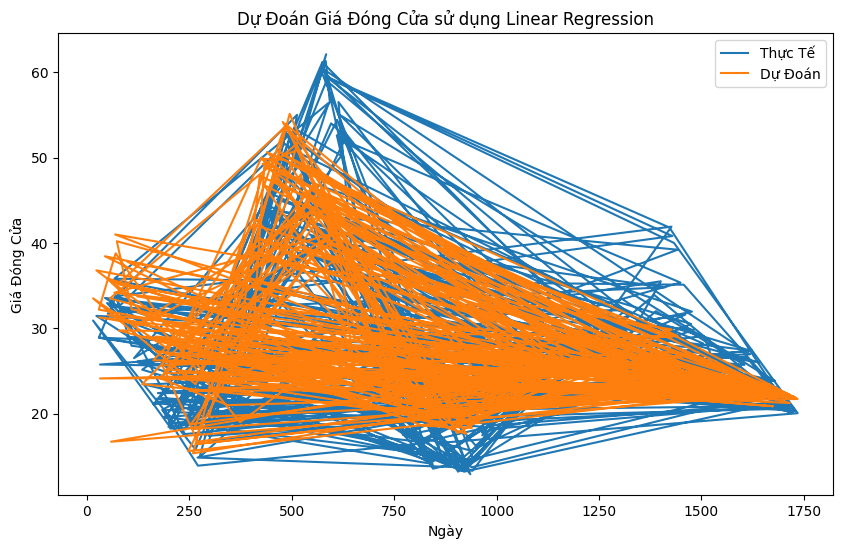

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import numpy as np

# Giả sử df là DataFrame chứa dữ liệu của bạn

# Lựa chọn các biến đầu vào
features = df[['Giá điều chỉnh', 'Khối lượng khớp lệnh']]

# Lựa chọn biến mục tiêu
target = df['Giá đóng cửa']

# Chia dữ liệu thành tập huấn luyện và tập kiểm thử
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Tạo và huấn luyện mô hình Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Dự đoán giá đóng cửa trên tập kiểm thử
predictions = model.predict(X_test)

# Đánh giá hiệu suất của mô hình
mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error: {mae}')

# Vẽ biểu đồ dự đoán và thực tế
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Thực Tế')
plt.plot(y_test.index, predictions, label='Dự Đoán')
plt.title('Dự Đoán Giá Đóng Cửa sử dụng Linear Regression')
plt.xlabel('Ngày')
plt.ylabel('Giá Đóng Cửa')
plt.legend()
plt.show()

## Câu hỏi 2:

### 2.1 Nội dung câu hỏi
- Làm thế nào giá cao nhất và giá thấp nhất biến động theo thời gian?

### 2.2 Lợi ích khi trả lời câu hỏi
- Hiểu biến động của giá cao nhất và giá thấp nhất có thể giúp định rõ biên độ của chứng khoán.

### 2.3 Nguồn cảm hứng của câu hỏi
Nhóm tự suy nghĩ trong quá trình khám phá dữ liệu

### 2.4 Cách tìm ra câu trả lời
- Vẽ biểu đồ đường thể hiện sự biến động của giá cao nhất và giá thấp nhất qua các ngày.

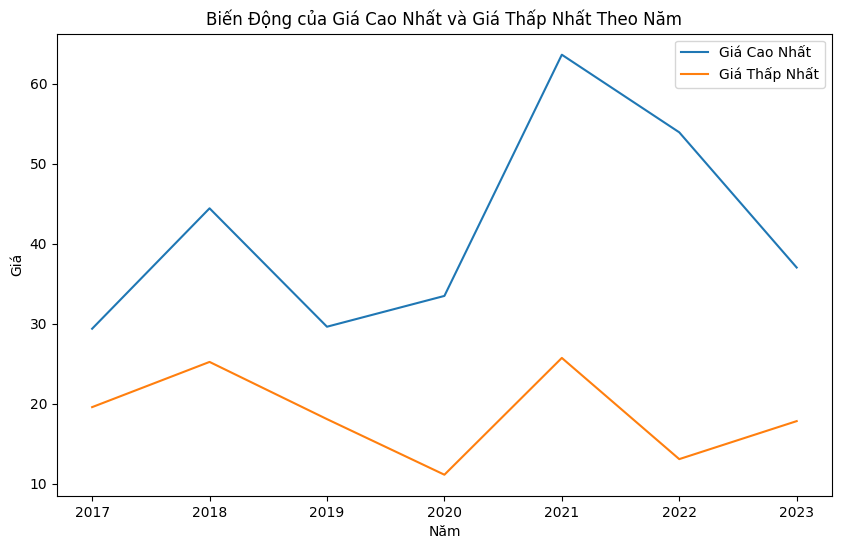

In [9]:
# Chuyển cột 'Ngày' thành dạng datetime với tham số dayfirst=True
df['Ngày'] = pd.to_datetime(df['Ngày'], dayfirst=True)

# Tạo cột mới là năm từ cột 'Ngày'
df['Năm'] = df['Ngày'].dt.year

# Biểu đồ đường cho biến động của giá cao nhất và giá thấp nhất theo năm
plt.figure(figsize=(10, 6))
plt.plot(df.groupby('Năm')['Giá cao nhất'].max(), label='Giá Cao Nhất')
plt.plot(df.groupby('Năm')['Giá thấp nhất'].min(), label='Giá Thấp Nhất')
plt.title('Biến Động của Giá Cao Nhất và Giá Thấp Nhất Theo Năm')
plt.xlabel('Năm')
plt.ylabel('Giá')
plt.legend()
plt.show()


## Câu hỏi 3:

### 3.1 Nội dung câu hỏi
- Mối quan hệ giữa giá mở cửa và giá đóng cửa là như thế nào?

### 3.2 Lợi ích khi trả lời câu hỏi
- Hiểu mối quan hệ giữa giá mở cửa và giá đóng cửa có thể giúp phân tích hướng của xu hướng chứng khoán.

### 3.3 Nguồn cảm hứng của câu hỏi
Nhóm tự suy nghĩ trong quá trình khám phá dữ liệu

### 3.4 Cách tìm ra câu trả lời
- Vẽ biểu đồ scatter plot với trục x là giá mở cửa và trục y là giá đóng cửa.

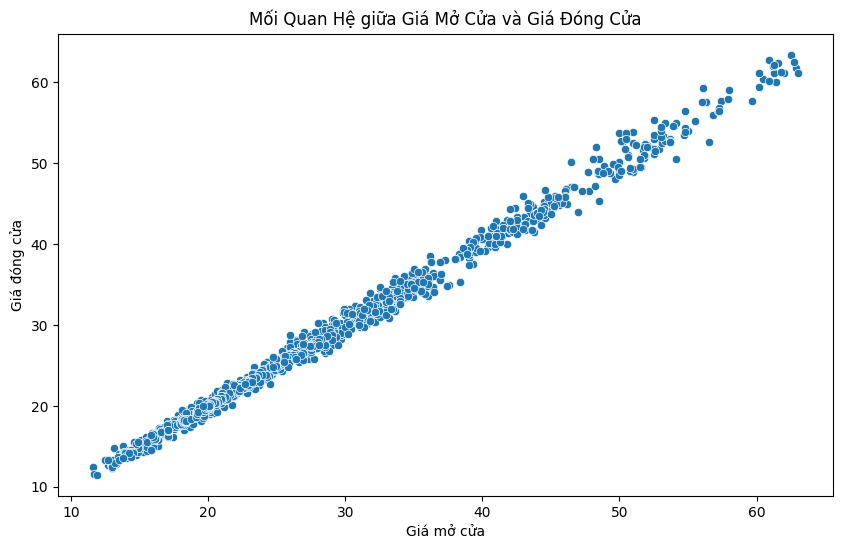

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Giá mở cửa', y='Giá đóng cửa', data=df)
plt.title('Mối Quan Hệ giữa Giá Mở Cửa và Giá Đóng Cửa')
plt.show()